In [1]:
### Mini batch gradient descent ---> stochastic gradient descent done with batches of data instead of single sample.

import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Datasets/Housing.csv")
df = df[["price","area", "bedrooms"]]
df.head()

,price,area,bedrooms
0,13300000,7420,4
1,12250000,8960,4
2,12250000,9960,3
3,12215000,7500,4
4,11410000,7420,4


In [3]:
### scaling data

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaled_x = scaler_x.fit_transform(df.drop(["price"], axis=1))
scaled_y = scaler_y.fit_transform(df[["price"]])

In [23]:
def mini_BGD(x, y_true, epochs, learning_rate=0.01):
    num_fetures = x.shape[1] # num of cols
    bias = 0
    weights = np.ones(shape=(num_fetures))
    total_samples = x.shape[0] # rows
    batch_size = 100
    cost_list = []
    epoch_list = []
    if batch_size > total_samples:
        batch_size = total_samples
        
    for i in range(epochs):
        random_idx = np.random.permutation(total_samples)
        x_samples = x[random_idx]
        y_samples = y_true[random_idx]

        for j in range(0, total_samples, batch_size):
            x_mini = x_samples[j:j+batch_size]
            y_mini = y_samples[j:j+batch_size]

            y_pred = np.dot(weights, x_mini.T) + bias
            weights_pd = -(2/len(x_mini)) * (x_mini.T.dot(y_mini-y_pred))
            bias_pd = -(2/len(x_mini)) * np.sum(y_mini-y_pred)

            weights = weights - learning_rate*weights_pd
            bias = bias - learning_rate*bias_pd

            cost = np.mean(np.square(y_mini - y_pred))

        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return weights, bias, cost, cost_list, epoch_list

weights, bias, cost, cost_list, epoch_list = mini_BGD(scaled_x, scaled_y.reshape(scaled_y.shape[0],),1000)

print(weights)
print(bias)
print(cost)

[0.55783576 0.37430485]
-0.021573986208720596
0.009736859762800925


In [24]:
### prediction function based on the computed weights and biases

def predict(area, bedrooms, weights, bias):
    scaled_inp = scaler_x.transform([[area, bedrooms]])[0]
    scaled_price = weights[0]*scaled_inp[0] + weights[1]*scaled_inp[1] + bias

    unscaled_price = scaler_y.inverse_transform([[scaled_price]])[0][0]

    return unscaled_price

predict(7420, 4, weights ,bias)

np.float64(6649813.336372962)

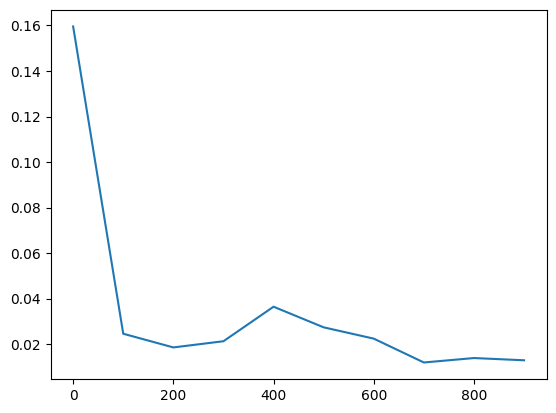

In [25]:
plt.plot(epoch_list, cost_list)